# Cálculo de la media y varianza valiéndose de la técnica de remuestreo (bootstrap) obteniendo 10000 $\overline{s}$.

En el anexo XVII del Reglamento Delegado, figuran los requisitos y demostraciones que deben realizarse para la aprobación de parámetros específicos de empresa. Entre ellos, se debe demostrar que la siniestralidad agregada sigue una distribución logarítmica normal $LN(\mu,\sigma)$.
Se pide, partiendo de los siniestros recogidos en el fichero *siniestralidad_agregada.csv*:


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/01_raw/siniestralidad_agregada.csv', sep=';', decimal=',')
df.head()

,Id,Importe
0,0,41.27
1,1,155.30
2,2,259.44
3,3,106.53
4,4,232.71


In [13]:
siniestralidad_agregada = df['Importe'].sum()
print(f'Siniestralidad agregada: {siniestralidad_agregada:,.0f}')

Siniestralidad agregada: 3,059,720


In [5]:
n = df.Importe.count()
b = 10000

sampling = pd.DataFrame(data=np.zeros(b),columns=['s'])
for i in range(b):
    sample = df.sample(n, replace=True)
    summ = sample['Importe'].sum()
    sampling.loc[i, 's'] = summ

sampling['z'] = np.log(sampling['s'])
boot_mean = sampling['z'].mean()
boot_std = sampling['z'].std()

In [6]:
#variables candidatas LN(mu=boot_mean, sigma=boot_stp)
print(boot_mean, boot_std)

14.933801452682793 0.0049973631069318


### Cálculo de  los principales percentiles (.25, .5, 0.75) de la distribución teórica y compararlos con los datos de la distribución empírica de los siniestros.

NOTA: siendo s la siniestralidad total y z la variable aleatoria normal, entonces $s = e^{z}$ y $z = log(s)$ con media y varianza:

$E(s) = e^{\mu+\frac{\sigma^2}{2}}$

$Var(s) = (e^{\sigma^2} -1) e^{2\mu+\sigma^2}$

In [7]:
sampling['z'].describe()

count    10000.000000
mean        14.933801
std          0.004997
min         14.913227
25%         14.930411
50%         14.933805
75%         14.937171
max         14.951882
Name: z, dtype: float64

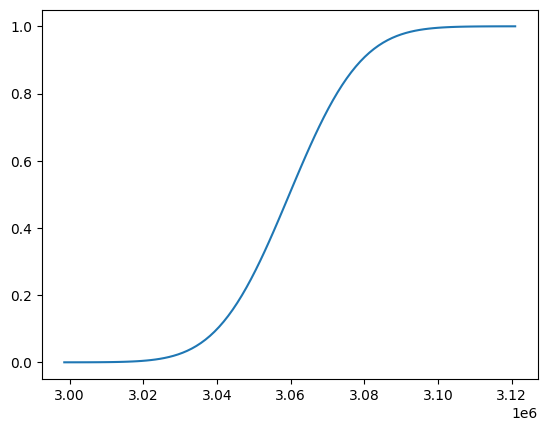

In [8]:
mu=boot_mean
sigma=boot_std 
lognormal = st.lognorm(s=sigma,scale=np.exp(mu))
x = np.linspace(siniestralidad_agregada*0.98, siniestralidad_agregada*1.02, 100)
plt.plot(x, lognormal.cdf(x))
plt.show()